# 1. Load Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split

In [7]:
cos = [-0.866, -0.682, -0.4226, -0.1045, 0.225, 0.5, 0.766, 0.8829, 0.9563]
print(f'{np.arccos(cos)}')

[2.61794307 2.32129015 2.00710849 1.67548746 1.34385329 1.04719755
 0.69820084 0.48879356 0.29672224]


In [2]:
import uproot
with uproot.open('Ntuples/test_sig2.root:Bsig') as tree:
    all_columns = tree.keys()
    #columns_to_read = [column for column in all_columns if column != "__MCDecayString__"]
    arr = tree.arrays(all_columns, library="np")
    test_sig = pd.DataFrame(arr)
    
columns_with_nan = ['B_isSignal','B_mcPDG','K_isSignal','K_mcPDG','pi_isSignal','pi_mcPDG','g1_isSignal','g2_isSignal']
test_sig[columns_with_nan] = test_sig[columns_with_nan].fillna(-1)

with uproot.open('Ntuples/test_misID1.root:Bsig') as tree:
    all_columns = tree.keys()
    #columns_to_read = [column for column in all_columns if column != "__MCDecayString__"]
    arr = tree.arrays(all_columns, library="np")
    test_misID = pd.DataFrame(arr)
    
test_misID[columns_with_nan] = test_misID[columns_with_nan].fillna(-1)

with uproot.open('Ntuples/test_charged2.root:Bsig') as tree:
    all_columns = tree.keys()
    #columns_to_read = [column for column in all_columns if column != "__MCDecayString__"]
    arr = tree.arrays(all_columns, library="np")
    test_charged = pd.DataFrame(arr)
    
with uproot.open('Ntuples/test_ccbar2.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    test_ccbar = pd.DataFrame(arr)
    
test_charged[columns_with_nan] = test_charged[columns_with_nan].fillna(-1)

In [39]:
with uproot.open('Ntuples/MC15ri_b_Kpi0_signal_8/00.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_signal = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_misID/misID.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_misID = pd.DataFrame(arr)

In [37]:
import uproot
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_9/ccbar.root:Bsig') as tree:
    all_columns = tree.keys()
    #columns_to_read = [column for column in all_columns if column != "__MCDecayString__"]
    arr = tree.arrays(all_columns, library="np")
    df_ccbar9 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_9/ssbar.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_ssbar9 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_8/ssbar.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_ssbar8 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_8/ccbar.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_ccbar8 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_9/mixed.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_mixed9 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_9/charged.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_charged9 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_8/mixed.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_mixed8 = pd.DataFrame(arr)
    
with uproot.open('Ntuples/MC15ri_b_Kpi0_generic_200fb_8/charged.root:Bsig') as tree:
    all_columns = tree.keys()
    arr = tree.arrays(all_columns, library="np")
    df_charged8 = pd.DataFrame(arr)
    
# df_ssbar[['B_isSignal','B_mcPDG','K_isSignal','K_mcPDG','pi_isSignal','pi_mcPDG']] = df_ssbar[['B_isSignal','B_mcPDG','K_isSignal','K_mcPDG','pi_isSignal','pi_mcPDG']].fillna(-1)
# df_ccbar[['B_isSignal','B_mcPDG','K_isSignal','K_mcPDG','pi_isSignal','pi_mcPDG']] = df_ccbar[['B_isSignal','B_mcPDG','K_isSignal','K_mcPDG','pi_isSignal','pi_mcPDG']].fillna(-1)

In [17]:
df_ccbar8.query('B_R2<0.45').B_cosTBTO.describe()

count    2298.000000
mean        0.724920
std         0.222771
min         0.000150
25%         0.619776
50%         0.783753
75%         0.893548
max         0.999972
Name: B_cosTBTO, dtype: float64

In [18]:
df_signal.query('B_R2<0.45').B_cosTBTO.describe()

count    39764.000000
mean         0.419794
std          0.254465
min          0.000003
25%          0.204412
50%          0.407981
75%          0.614370
max          0.999944
Name: B_cosTBTO, dtype: float64

In [40]:
print(f"""signal_norm = {len(df_charged8.query('B_isSignal==1 and B_R2<0.45 and B_cosTBTO<0.8'))/len(df_signal.query('B_R2<0.45 and B_cosTBTO<0.8'))}
misID_norm = {len(df_charged8.query('B_mcErrors==128 and B_R2<0.45 and B_cosTBTO<0.8'))/len(df_misID.query('B_mcErrors==128 and B_R2<0.45 and B_cosTBTO<0.8'))}
qqbar_norm = {(len(df_ssbar8.query('B_R2<0.45 and B_cosTBTO<0.8'))+len(df_ccbar8.query('B_R2<0.45 and B_cosTBTO<0.8')))/(len(df_ssbar9.query('B_R2<0.45 and B_cosTBTO<0.8'))+len(df_ccbar9.query('B_R2<0.45 and B_cosTBTO<0.8')))}
BBbar_norm = {(len(df_mixed8.query('B_R2<0.45 and B_cosTBTO<0.8'))+len(df_charged8.query('B_mcErrors>0 and B_mcErrors!=128 and B_R2<0.45 and B_cosTBTO<0.8')))/(len(df_mixed9.query('B_R2<0.45 and B_cosTBTO<0.8'))+len(df_charged9.query('B_mcErrors>0 and B_mcErrors!=128 and B_R2<0.45 and B_cosTBTO<0.8')))}""")

signal_norm = 0.015621568196793324
misID_norm = 0.0006453694740238787
qqbar_norm = 1.0072951739618405
BBbar_norm = 1.0610932475884245


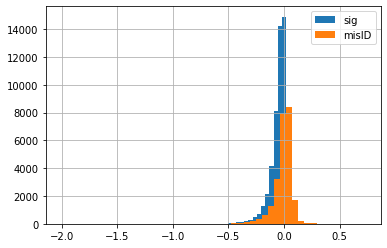

In [40]:
df_signal.B_deltaE.hist(bins=30,label='sig')
df_misID.B_deltaE.hist(bins=50,label='misID')
plt.legend()

In [12]:
(len(df_mixed8)+len(df_charged8.query('B_mcErrors>0 and B_mcErrors!=128')))

492

In [4]:
df_ssbar.head()

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,B_Mbc,B_deltaE,...,g2_clusterNHits,g2_clusterTiming,g2_clusterE9E21,g2_clusterE,g2_clusterReg,g2_genMotherPDG,g2_mcPDG,g2_isSignal,g2_beamBackgroundSuppression,g2_fakePhotonSuppression
0,1003,0,15915646,24797,0,1,1.0,10.579557,5.270717,-0.442237,...,12.304688,0.000000,0.985352,1.222275,2.0,111.0,22.0,1.0,0.998186,0.908309
1,1003,0,15916106,24797,0,1,1.0,10.579557,5.280062,-0.174867,...,14.843750,2.929688,0.970703,1.159419,2.0,111.0,22.0,1.0,0.998446,0.986526
2,1003,0,15920459,24797,0,1,1.0,10.579557,5.262477,-0.276470,...,9.570312,1.953125,0.983398,0.421403,2.0,111.0,22.0,1.0,0.998603,0.972229
3,1003,0,15923489,24797,0,1,1.0,10.579557,5.262691,0.009386,...,12.890625,-6.835938,0.968750,0.374392,2.0,111.0,22.0,1.0,0.998022,0.964164
4,1003,0,9625527,24797,0,1,1.0,10.579557,5.276740,-0.368120,...,12.304688,0.976562,0.986328,0.794016,2.0,111.0,22.0,1.0,0.998233,0.998770


# 2. Missing values

In [9]:
# number of events
df_test.__event__.nunique()

24207

In [6]:
# number of candidates
len(df_test)

24207

In [7]:
df_test.head()

,__experiment__,__run__,__event__,__production__,__candidate__,__ncandidates__,__weight__,Ecms,B_Mbc,B_deltaE,...,g2_clusterNHits,g2_clusterTiming,g2_clusterE9E21,g2_clusterE,g2_clusterReg,g2_genMotherPDG,g2_mcPDG,g2_isSignal,g2_beamBackgroundSuppression,g2_fakePhotonSuppression
0,1003,0,690280,26308,0,1,1.0,10.579557,5.272751,0.083583,...,13.867188,-0.976562,0.984375,1.646006,2.0,111.0,22.0,1.0,0.998653,0.999078
1,1003,0,690390,26308,0,1,1.0,10.579557,5.280171,0.054157,...,11.914062,-1.464844,0.991211,0.952955,2.0,111.0,22.0,1.0,0.997489,0.912098
2,1003,0,690546,26308,0,1,1.0,10.579557,5.286756,0.224343,...,13.476562,0.488281,0.976562,1.971515,2.0,111.0,22.0,1.0,0.998546,0.922378
3,1003,0,690643,26308,0,1,1.0,10.579557,5.276541,0.064775,...,15.625000,0.000000,0.985352,2.478123,2.0,111.0,22.0,1.0,0.999642,0.999356
4,1003,0,690695,26308,0,1,1.0,10.579557,5.279676,-0.000711,...,14.453125,0.000000,0.946289,1.179799,2.0,111.0,22.0,1.0,0.998713,0.931177


In [ ]:
df_test[:100000].K_CMS_p.describe()

In [10]:
pd.set_option('display.max_rows', None)
print(df_test.isna().sum())

__experiment__                    0
__run__                           0
__event__                         0
__production__                    0
__candidate__                     0
__ncandidates__                   0
__weight__                        0
Ecms                              0
B_Mbc                             0
B_deltaE                          0
B_isContinuumEvent                0
B_R2                              0
B_thrustBm                        0
B_thrustOm                        0
B_cosTBTO                         0
B_cosTBz                          0
B_KSFWV_et                        0
B_KSFWV_mm2                       0
B_KSFWV_hso00                     0
B_KSFWV_hso01                     0
B_KSFWV_hso02                     0
B_KSFWV_hso03                     0
B_KSFWV_hso04                     0
B_KSFWV_hso10                     0
B_KSFWV_hso12                     0
B_KSFWV_hso14                     0
B_KSFWV_hso20                     0
B_KSFWV_hso22               

# 3. Kaon ID performance

In [11]:
df_test[['K_isSignal','K_mcPDG']].value_counts()

K_isSignal  K_mcPDG
 0.0        -211.0     12605
             211.0     11485
-1.0        -1.0          76
 1.0         321.0        22
            -321.0         8
 0.0         2212.0        7
            -13.0          2
             13.0          2
dtype: int64

In [ ]:
[K_kaonIDNN, K_kaonID_noSVD, K_pionIDNN, K_pionID_noSVD]

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

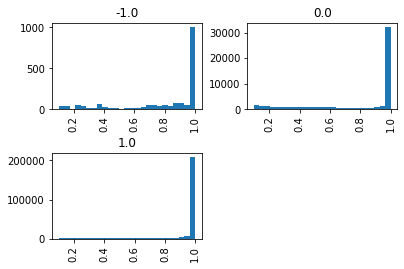

In [11]:
df.hist('K_binaryKID',bins=25, by='K_isSignal') # K_binaryKID > 0.9

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

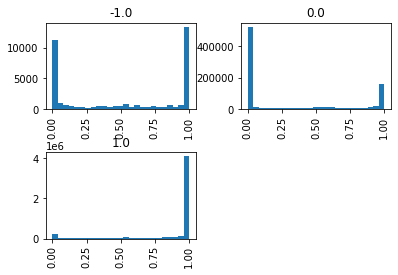

In [10]:
df.hist('K_kaonID_noSVD',bins=25, by='K_isSignal') # K_kaonID_noSVD > 0.9

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

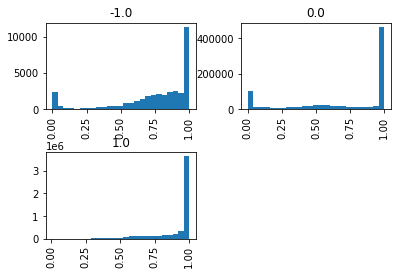

In [12]:
df.hist('K_kaonIDNN',bins=25, by='K_isSignal')

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

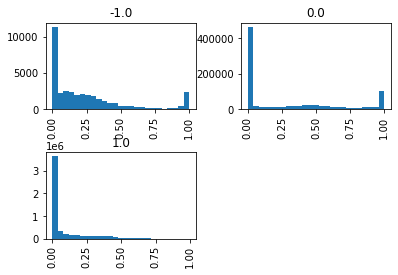

In [13]:
df.hist('K_pionIDNN',bins=25, by='K_isSignal') # K_pionIDNN < 0.1

In [16]:
filtered_df1 = df.query('K_kaonID_noSVD > 0.5 and K_pionIDNN < 0.75').copy()

In [17]:
print(filtered_df1.isna().sum())

__experiment__                0
__run__                       0
__event__                     0
__production__                0
__candidate__                 0
__ncandidates__               0
__weight__                    0
Ecms                          0
B_CMS_px                      0
B_CMS_py                      0
B_CMS_pz                      0
B_CMS_pt                      0
B_CMS_p                       0
B_CMS_E                       0
B_px                          0
B_py                          0
B_pz                          0
B_pt                          0
B_p                           0
B_E                           0
B_Mbc                       665
B_deltaE                      0
B_isContinuumEvent            0
B_R2                          0
B_thrustBm                    0
B_thrustOm                    0
B_cosTBTO                     0
B_cosTBz                      0
B_KSFWV_et                    0
B_KSFWV_mm2                   0
B_KSFWV_hso00                 0
B_KSFWV_

# 4. pi0 beamBKG and fakePhoton

In [51]:
df_mixed[['pi_isSignal','pi_mcPDG']].value_counts()

pi_isSignal  pi_mcPDG  
 1.0          111.0        515034
 0.0          300553.0     141156
              511.0         41285
             -511.0         41080
              221.0         18461
-1.0         -1.0            7646
 0.0          310.0          5949
              421.0          4803
             -421.0          4573
              411.0          3101
             -411.0          3037
              331.0          2668
             -413.0          2292
              413.0          2244
              423.0          2107
             -431.0          2084
              431.0          2054
             -423.0          1932
              433.0          1770
             -433.0          1685
             -2212.0         1237
             -20213.0        1203
              20213.0        1144
              10431.0        1130
             -211.0          1108
             -10431.0        1060
              211.0           867
              130.0           705
              20433.0   

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

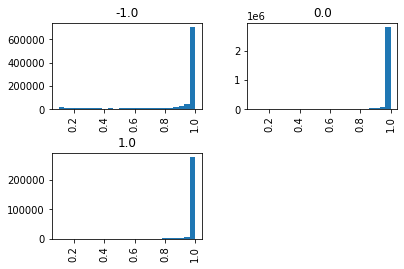

In [10]:
df.hist('pi_d0_beamBkgSuppress',bins=25, by='pi_isSignal')

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

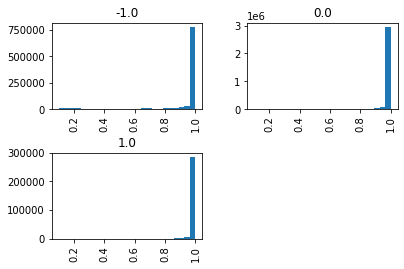

In [11]:
df.hist('pi_d1_beamBkgSuppress',bins=25, by='pi_isSignal')

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

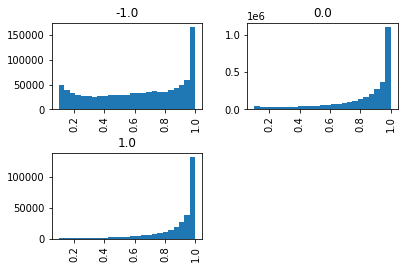

In [12]:
df.hist('pi_d0_fakePhoSuppress',bins=25, by='pi_isSignal') # pi_d0_fakePhoSuppress>0.8

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

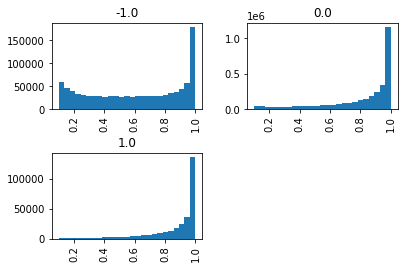

In [13]:
df.hist('pi_d1_fakePhoSuppress',bins=25, by='pi_isSignal') # pi_d1_fakePhoSuppress>0.8

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

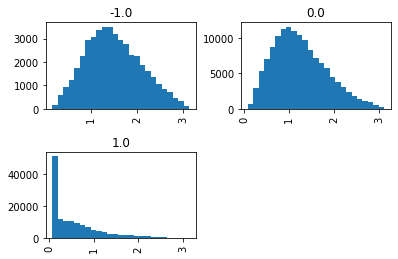

In [25]:
df.hist('pi_daughterAngle',bins=25, by='pi_isSignal') # pi_daughterAngle<1

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

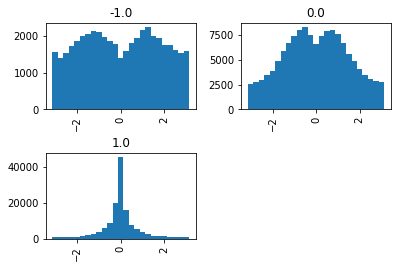

In [26]:
df.hist('pi_daughterDiff_phi',bins=25,by='pi_isSignal') # abs(pi_daughterDiff_phi)<1

array([[<AxesSubplot:title={'center':'-1.0'}>,
        <AxesSubplot:title={'center':'0.0'}>],
       [<AxesSubplot:title={'center':'1.0'}>, <AxesSubplot:>]],
      dtype=object)

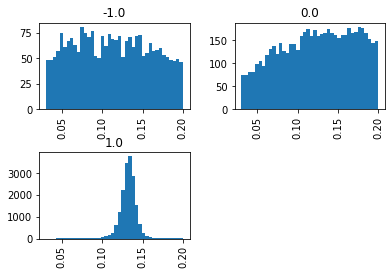

In [8]:
test_sig.query('pi_M<0.2').hist('pi_M',bins=40, by='pi_isSignal')

In [ ]:
df.hist('pi_daughterDiff_rest_phi',bins=25,by='pi_isSignal')

In [19]:
print(filtered_df2.isna().sum())

__experiment__                0
__run__                       0
__event__                     0
__production__                0
__candidate__                 0
__ncandidates__               0
__weight__                    0
Ecms                          0
B_CMS_px                      0
B_CMS_py                      0
B_CMS_pz                      0
B_CMS_pt                      0
B_CMS_p                       0
B_CMS_E                       0
B_px                          0
B_py                          0
B_pz                          0
B_pt                          0
B_p                           0
B_E                           0
B_Mbc                       600
B_deltaE                      0
B_isContinuumEvent            0
B_R2                          0
B_thrustBm                    0
B_thrustOm                    0
B_cosTBTO                     0
B_cosTBz                      0
B_KSFWV_et                    0
B_KSFWV_mm2                   0
B_KSFWV_hso00                 0
B_KSFWV_

# 5. B_Mbc

Text(0, 0.5, '# of Events per bin')

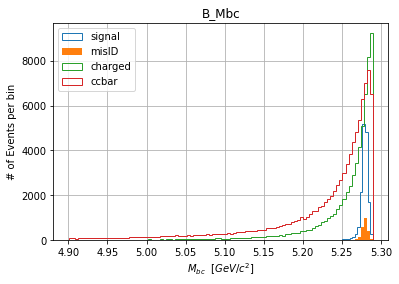

In [3]:
plt.hist(test_sig.query('B_isSignal==1 and B_Mbc>4.9').B_Mbc, bins=100, label='signal', histtype='step')
plt.hist(test_misID.query('B_mcErrors==128 and B_Mbc>4.9').B_Mbc, bins=70, label='misID', histtype='bar')
plt.hist(test_charged.query('B_mcErrors!=128 and B_mcErrors>0 and B_Mbc>4.9').B_Mbc, bins=100, label='charged', histtype='step')
plt.hist(test_ccbar.query('B_Mbc>4.9').B_Mbc, bins=100, label='ccbar', histtype='step')
plt.legend(loc='upper left')
plt.grid()
plt.title('B_Mbc')
plt.xlabel('$M_{bc}$  $[GeV/c^2]$')
plt.ylabel('# of Events per bin')
#plt.xlim(4,6)

(5.2, 5.3)

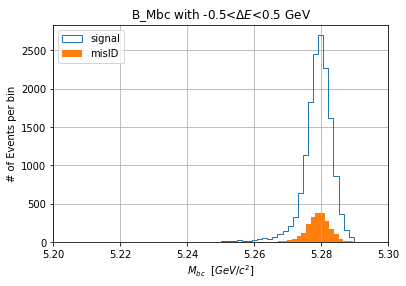

In [4]:
plt.hist(test_sig.query('B_isSignal==1 and B_Mbc>5.2 and -0.5<B_deltaE<0.5').B_Mbc, bins=50, label='signal', histtype='step')
plt.hist(test_misID.query('B_mcErrors==128 and B_Mbc>5.2 and -0.5<B_deltaE<0.5').B_Mbc, bins=50, label='misID', histtype='bar')
#plt.hist(test_charged.query('B_mcErrors!=128 and B_mcErrors>0 and B_Mbc>5.2 and -0.5<B_deltaE<0.5').B_Mbc, bins=50, label='charged', histtype='step')
#plt.hist(test_ccbar.query('B_Mbc>5.2 and -0.5<B_deltaE<0.5').B_Mbc, bins=50, label='ccbar', histtype='step')
plt.legend(loc='upper left')
plt.grid()
plt.title('B_Mbc with -0.5<$\Delta E$<0.5 GeV')
plt.xlabel('$M_{bc}$  $[GeV/c^2]$')
plt.ylabel('# of Events per bin')
plt.xlim(5.2,5.3)

Text(0, 0.5, '# of Events per bin')

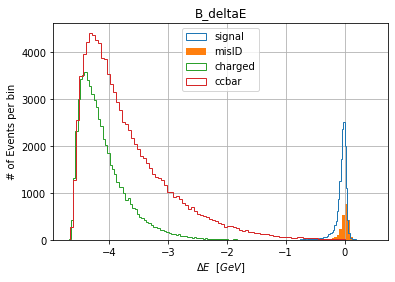

In [47]:
plt.hist(test_sig.query('B_isSignal==1 and B_deltaE<0.5').B_deltaE, bins=100, label='signal', histtype='step')
plt.hist(test_misID.query('B_mcErrors==128 and B_deltaE<0.5').B_deltaE, bins=50, label='misID', histtype='bar')
plt.hist(test_charged.query('B_mcErrors!=128 and B_mcErrors>0 and B_deltaE<0.5').B_deltaE, bins=100, label='charged', histtype='step')
plt.hist(test_ccbar.query('B_deltaE<0.5').B_deltaE, bins=100, label='ccbar', histtype='step')
plt.legend(loc='upper center')
plt.grid()
plt.title('B_deltaE')
plt.xlabel('$\Delta E$  $[GeV]$')
plt.ylabel('# of Events per bin')
#plt.xlim(4,6)

Text(0, 0.5, '# of Events per bin')

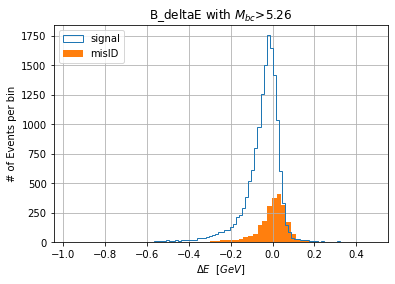

In [57]:
plt.hist(test_sig.query('B_isSignal==1 and B_Mbc>5.26 and -1<B_deltaE<0.5').B_deltaE, bins=100, label='signal', histtype='step')
plt.hist(test_misID.query('B_Mbc>5.26 and B_mcErrors==128 and -1<B_deltaE<0.5').B_deltaE, bins=50, label='misID', histtype='bar')
#plt.hist(test_charged.query('B_Mbc>5.26 and B_mcErrors!=128 and B_mcErrors>0 and -1<B_deltaE<0.5').B_deltaE, bins=100, label='charged', histtype='step')
#plt.hist(test_ccbar.query('B_Mbc>5.26 and -1<B_deltaE<0.5').B_deltaE, bins=100, label='ccbar', histtype='step')
plt.legend(loc='upper left')
plt.grid()
plt.title('B_deltaE with $M_{bc}$>5.26')
plt.xlabel('$\Delta E$  $[GeV]$')
plt.ylabel('# of Events per bin')
#plt.xlim(4,6)

Text(0.5, 0, 'B_deltaE  [GeV]')

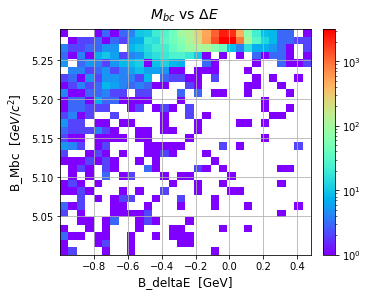

In [8]:
df_all = pd.concat([test_sig.query('B_isSignal==1 and B_Mbc>5 and -1<B_deltaE<0.5'),
                    test_misID.query('B_mcErrors==128 and B_Mbc>5 and -1<B_deltaE<0.5'),
                    test_charged.query('B_mcErrors!=128 and B_mcErrors>0 and B_Mbc>5 and -1<B_deltaE<0.5'),
                    test_ccbar.query('-1<B_deltaE<0.5 and B_Mbc>5')], ignore_index=True)

plot_correlation(df=df_all, title='$M_{bc}$ vs $\Delta E$',cut=None,target='B_Mbc',variables=['B_deltaE'])
plt.ylabel('B_Mbc  [$GeV/c^2$]')
plt.xlabel('B_deltaE  [GeV]')

In [6]:
import matplotlib.colors as colors
import matplotlib.cm as cm

def plot_correlation(df, title, cut, target, variables):
    fig = plt.figure(figsize=[5*len(variables),4],constrained_layout=True)
    fig.suptitle(title,fontsize=14)
    for i in range(len(variables)):
        ax = fig.add_subplot(1,len(variables),i+1)
        counts, xedges, yedges, im = ax.hist2d(x=df.query(cut)[variables[i]] if cut else df[variables[i]], 
                  y=df.query(cut)[target] if cut else df[target], 
                  bins=30,cmap='rainbow', norm=colors.LogNorm())
        ax.set_ylabel(target,fontsize=12)
        ax.set_xlabel(variables[i],fontsize=12)
        ax.grid()
        fig.colorbar(im,orientation='vertical',ax=ax)

In [3]:
def plot_hist1d(data, title, variables, samples_dict):
    fig = plt.figure(figsize=[5*len(variables),4],constrained_layout=True)
    fig.suptitle(title,fontsize=14)
    for index, (var, cut) in enumerate(variables.items()):
        ax = fig.add_subplot(1,len(variables),index+1)
        df = data.query(cut)
        for name, selection in samples_dict.items():
            ax.hist(df.query(selection)[var], bins=20, label=name)
        ax.set_ylabel('# of events per bin',fontsize=12)
        ax.set_xlabel(var,fontsize=12)
        ax.legend()
        ax.grid()

In [4]:
df_test = pd.concat([test_charged, test_ccbar], ignore_index=True)
variables = {'B_deltaE':'B_Mbc>5.26 and B_R2<0.45 and -1<B_deltaE<1',
             'B_Mbc':'-0.4<B_deltaE<0.4 and B_R2<0.45 and B_Mbc>4'}
samples_dict = {'signal':'B_isSignal==1', 'misID':'B_mcErrors==128',
                'BBbar': 'B_mcErrors>0 and B_mcErrors!=128',
                'qqbar': 'B_isContinuumEvent==True'}

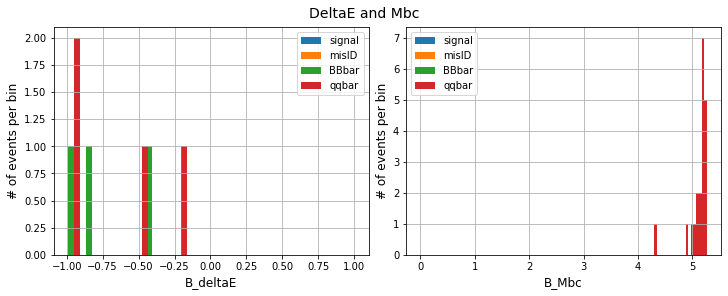

In [5]:
plot_hist1d(df_test, 'DeltaE and Mbc', variables, samples_dict)

In [14]:
print(missing_photon['__MCDecayString__'][43])

Content of MCParticle list
╰── Upsilon(4S) (300553)
    ├── B- (-521)
    │   ├── K- (-321)
    │   │   ├╶╶ e- (11)
    │   │   ├╶╶ gamma (22)
    │   │   ├╶╶ gamma (22)
    │   │   ├╶╶ n0 (2112)
    │   │   ├╶╶ n0 (2112)
    │   │   ├╶╶ pi0 (111)
    │   │   │   ├╶╶ gamma (22)
    │   │   │   ╰╶╶ gamma (22)
    │   │   ├╶╶ n0 (2112)
    │   │   ├╶╶ n0 (2112)
    │   │   ├╶╶ n0 (2112)
    │   │   ├╶╶ n0 (2112)
    │   │   ╰╶╶ n0 (2112)
    │   ├── pi0 (111)
    │   │   ├── gamma (22)
    │   │   ╰── gamma (22)
    │   ╰── gamma (22)
    ╰── B+ (521)
        ├── anti-D*0 (-423)
        │   ├── anti-D0 (-421)
        │   │   ├── K_L0 (130)
        │   │   │   ├╶╶ pi0 (111)
        │   │   │   │   ├╶╶ gamma (22)
        │   │   │   │   ╰╶╶ gamma (22)
        │   │   │   ├╶╶ pi0 (111)
        │   │   │   │   ├╶╶ gamma (22)
        │   │   │   │   ╰╶╶ gamma (22)
        │   │   │   ╰╶╶ n0 (2112)
        │   │   ├── pi+ (211)
        │   │   │   ├╶╶ nu_mu (14)
        │   │   │   ╰╶╶ mu+ (-1

# 7. Final Selection

In [38]:
final_df = df.query('abs(pi_daughterDiff_phi)<1 and pi_daughterAngle<1 and \
abs(pi_daughterDiff_theta)<0.5 and pi_d0_fakePhotonSuppression>0.8 and pi_d1_fakePhotonSuppression>0.8 and \
K_kaonID_noSVD>0.9 and K_pionIDNN<0.1 and K_binaryKID>0.9 and \
B_daughterAngle_CMS>2.96 and abs(B_daughterDiff_CMS_phi)>2.9 and abs(B_daughterDiff_CMS_p)<0.5')
len(final_df)

7787

In [18]:
pd.set_option('display.max_rows', None)
print(final_df.isna().sum())

__experiment__             0
__run__                    0
__event__                  0
__production__             0
__candidate__              0
__ncandidates__            0
__weight__                 0
Ecms                       0
B_CMS_px                   0
B_CMS_py                   0
B_CMS_pz                   0
B_CMS_pt                   0
B_CMS_p                    0
B_CMS_E                    0
B_CMS_mcE                  0
B_CMS_mcP                  0
B_CMS_mcPT                 0
B_CMS_mcPX                 0
B_CMS_mcPY                 0
B_CMS_mcPZ                 0
B_CMS_mcPhi                0
B_Mbc                      0
B_deltaE                   0
B_isContinuumEvent         0
B_R2                       0
B_thrustBm                 0
B_thrustOm                 0
B_cosTBTO                  0
B_cosTBz                   0
B_KSFWV_et                 0
B_KSFWV_mm2                0
B_KSFWV_hso00              0
B_KSFWV_hso01              0
B_KSFWV_hso02              0
B_KSFWV_hso03 

In [31]:
final_df.query('B_isSignal==1').B_deltaE.describe()

count    457247.000000
mean         -0.034717
std           0.073897
min          -0.821423
25%          -0.063573
50%          -0.023744
75%           0.007981
max           0.777510
Name: B_deltaE, dtype: float64

In [23]:
sorted_signal = final_df.B_deltaE.sort_values()

In [33]:
sorted_signal[2500:-2500].describe()

count    497252.000000
mean         -0.036572
std           0.069472
min          -0.409595
25%          -0.065443
50%          -0.024916
75%           0.006922
max           0.139454
Name: B_deltaE, dtype: float64

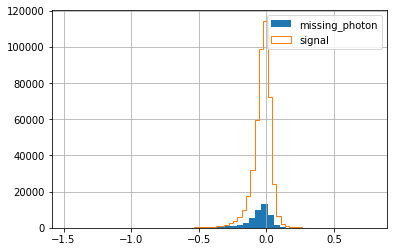

In [32]:
plt.hist(final_df.query('B_isSignal==0')['B_deltaE'],bins=50, label='missing_photon')
plt.hist(final_df.query('B_isSignal==1')['B_deltaE'],bins=50, label='signal',histtype='step')
plt.legend()
plt.grid()

In [34]:
with uproot.recreate('Samples/sig_missPhoton.root') as file:
    file['B'] = final_df.query('abs(B_deltaE)<0.4')

In [35]:
from sklearn.model_selection import train_test_split

# Split the DataFrame
signal_template, signal_test = train_test_split(final_df.query('abs(B_deltaE)<0.4'), test_size=0.3, random_state=0)

# Print the sizes of the resulting DataFrames
print("Template DataFrame size:", len(signal_template))
print("Test DataFrame size:", len(signal_test))

with uproot.recreate('sig_template.root') as file:
    file['B'] = signal_template
with uproot.recreate('sig_test.root') as file:
    file['B'] = signal_test

Template DataFrame size: 349610
Test DataFrame size: 149834


In [52]:
misID = df_misID.query('B_isSignal==0 and abs(K_mcPDG)!=321 and pi_mcPDG==111 and K_genMotherPDG==B_mcPDG and pi_genMotherPDG==B_mcPDG')
len(misID)

89

In [59]:
misID.query('B_deltaE>-0.4').B_deltaE.describe()

count    85.000000
mean      0.006566
std       0.094445
min      -0.353203
25%      -0.027416
50%       0.011654
75%       0.058062
max       0.288482
Name: B_deltaE, dtype: float64

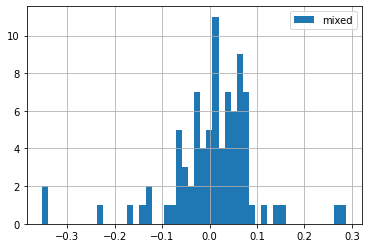

In [62]:
plt.hist(misID.query('B_deltaE>-0.4')['B_deltaE'],bins=50, label='mixed')
plt.legend()
plt.grid()

In [86]:
with uproot.recreate('Samples/misID.root') as file:
    file['B'] = misID.query('abs(B_deltaE)<0.4')

In [58]:
df_mixed.query('B_deltaE>-0.4')[['B_isSignal','B_mcPDG']].value_counts()

B_isSignal  B_mcPDG  
0.0          511.0       74
            -511.0       58
             300553.0    17
dtype: int64

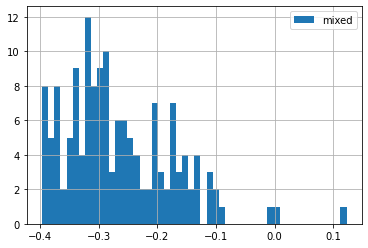

In [63]:
plt.hist(df_mixed.query('B_deltaE>-0.4')['B_deltaE'],bins=50, label='mixed')
plt.legend()
plt.grid()

In [66]:
df_charged.query('B_deltaE>-0.4')[['B_isSignal','B_mcPDG']].value_counts()

B_isSignal  B_mcPDG  
 1.0         521.0       328
            -521.0       319
 0.0        -521.0        89
             521.0        79
             300553.0     11
-1.0        -1.0           2
dtype: int64

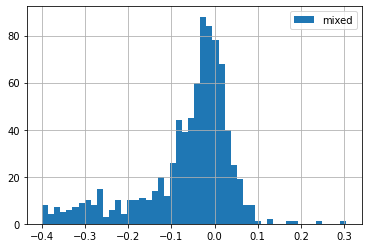

In [67]:
plt.hist(df_charged.query('B_deltaE>-0.4')['B_deltaE'],bins=50, label='charged')
plt.legend()
plt.grid()

In [69]:
df_charged.query('B_deltaE>-0.4 and B_isSignal!=1 and B_mcErrors!=1024')[['B_mcPDG','pi_mcPDG','K_mcPDG']].value_counts()

B_mcPDG    pi_mcPDG  K_mcPDG
-521.0     111.0     -321.0     54
 521.0     111.0      321.0     44
 300553.0  300553.0  -321.0      7
                      321.0      4
 521.0     111.0      211.0      3
-1.0       111.0     -1.0        2
-521.0     111.0     -211.0      1
dtype: int64

In [74]:
df_charged.query('B_deltaE>-0.4 and B_isSignal!=1 and B_mcErrors!=1024 and abs(B_mcPDG)==521 and abs(K_mcPDG)==321').B_mcErrors.value_counts()

16.0      90
1040.0     4
32.0       3
48.0       1
Name: B_mcErrors, dtype: int64

In [85]:
bbbar = pd.concat([df_mixed,df_charged])
with uproot.recreate('Samples/charged_mixed.root') as file:
    file['B'] = bbbar.query('abs(B_deltaE)<0.4')

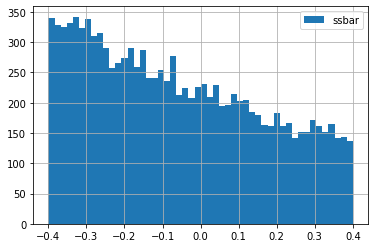

In [78]:
plt.hist(df_ssbar.query('abs(B_deltaE)<0.4')['B_deltaE'],bins=50, label='ssbar')
plt.legend()
plt.grid()

In [79]:
ssbar=df_ssbar.query('abs(B_deltaE)<0.4')
len(ssbar)

11394

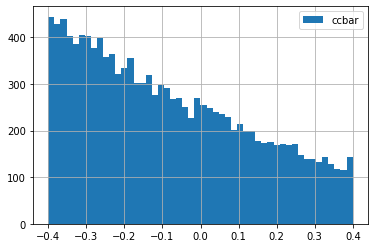

In [82]:
plt.hist(df_ccbar.query('abs(B_deltaE)<0.4')['B_deltaE'],bins=50, label='ccbar')
plt.legend()
plt.grid()

In [83]:
ccbar=df_ccbar.query('abs(B_deltaE)<0.4')
len(ccbar)

12913

In [84]:
qqbar = pd.concat([ssbar,ccbar])
with uproot.recreate('Samples/ccbar_ssbar.root') as file:
    file['B'] = qqbar.query('abs(B_deltaE)<0.4')

In [ ]:
qqbar = pd.concat([df_ssbar,df_ccbar])

# Split the DataFrame
bkg_template, bkg_test = train_test_split(qqbar.query('abs(B_deltaE)<0.4'), test_size=0.3, random_state=1)

# Print the sizes of the resulting DataFrames
print("Template DataFrame size:", len(bkg_template))
print("Test DataFrame size:", len(bkg_test))

with uproot.recreate('qqbar_template.root') as file:
    file['B'] = bkg_template
with uproot.recreate('qqbar_test.root') as file:
    file['B'] = bkg_test

Template DataFrame size: 17014
Test DataFrame size: 7293
